In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading files

In [32]:
results = pd.read_csv('./data/generated.csv')

In [33]:
results.shape

(3571, 16)

In [34]:
results.head()

,concurso,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15
0,1,1,2,3,6,8,9,11,14,15,17,19,20,21,22,25
1,2,2,4,9,11,12,13,14,15,16,18,19,20,23,24,25
2,3,2,5,7,9,10,11,12,14,16,17,18,19,20,21,23
3,4,2,3,5,8,10,11,13,14,15,16,18,21,22,23,24
4,5,2,3,4,5,6,7,9,11,13,14,16,19,23,24,25


In [35]:
results.dtypes

concurso    int64
bola1       int64
bola2       int64
bola3       int64
bola4       int64
bola5       int64
bola6       int64
bola7       int64
bola8       int64
bola9       int64
bola10      int64
bola11      int64
bola12      int64
bola13      int64
bola14      int64
bola15      int64
dtype: object

### Add field total_sum

In [36]:
results['total_sum'] = results[['bola1','bola2','bola3','bola4','bola5','bola6','bola7','bola8','bola9','bola10','bola11','bola12','bola13','bola14','bola15']].sum(axis=1)

### Frequency analysis

In [37]:
"""
melt
Combine all columns ball1 … ball15
Place all values ​​into a single column
Create a giant list of drawn numbers
"""
numbers_df = results.filter(like='bola')
numbers_long = numbers_df.melt(value_name='numbers') # 
numbers_long.head()


,variable,numbers
0,bola1,1
1,bola1,2
2,bola1,2
3,bola1,2
4,bola1,2


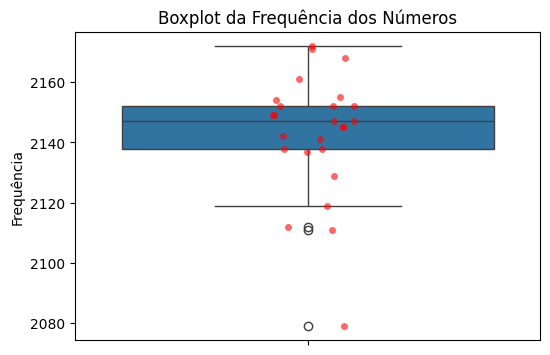

In [38]:
freq_numbers_df = numbers_long['numbers'].value_counts().sort_index() # count and order

plt.figure(figsize=(6, 4))
sns.boxplot(y=freq_numbers_df)
sns.stripplot(y=freq_numbers_df, color='red', alpha=0.6)
plt.title('Boxplot da Frequência dos Números')
plt.ylabel('Frequência')
plt.show()

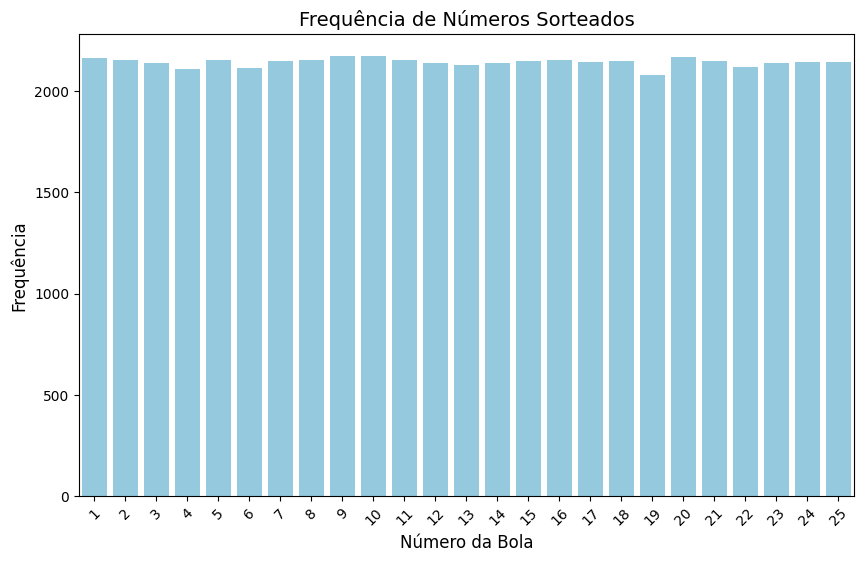

In [39]:
plt.figure(figsize=(10, 6))

sns.barplot(x=freq_numbers_df.index, y=freq_numbers_df.values, color='skyblue')

plt.title('Frequência de Números Sorteados', fontsize=14)
plt.xlabel('Número da Bola', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)

plt.show()

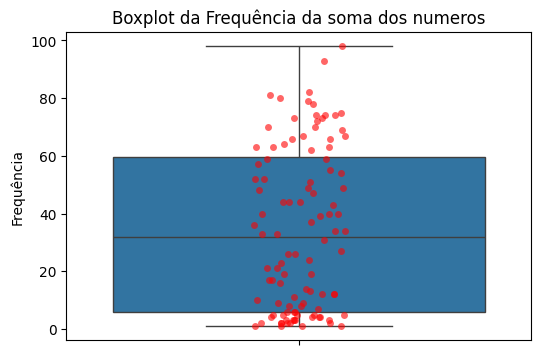

In [40]:
total_sum_freq = results['total_sum'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.boxplot(y=total_sum_freq)
sns.stripplot(y=total_sum_freq, color='red', alpha=0.6)
plt.title('Boxplot da Frequência da soma dos numeros')
plt.ylabel('Frequência')
plt.show()

In [41]:
total_sum_freq.head()

total_sum
141    3
143    2
144    1
147    5
148    3
Name: count, dtype: int64

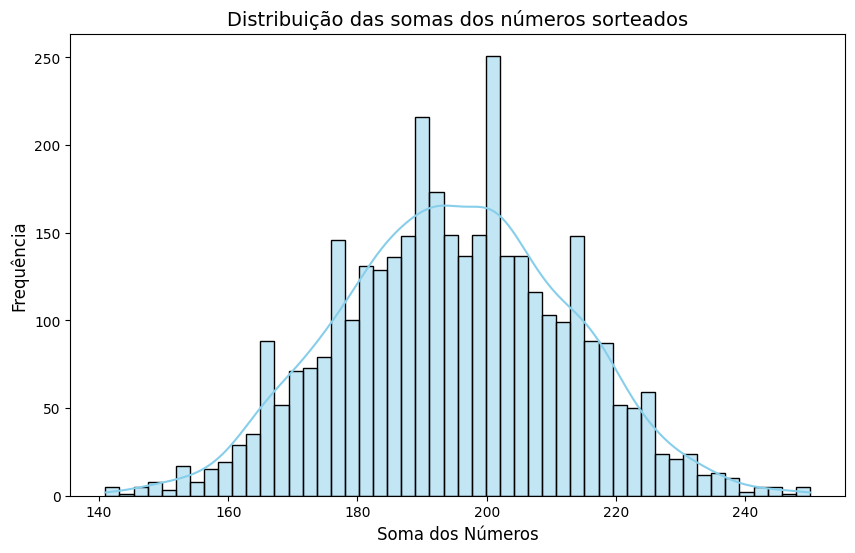

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(results['total_sum'], bins=50, kde=True, color='skyblue')

plt.title('Distribuição das somas dos números sorteados', fontsize=14)
plt.xlabel('Soma dos Números', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

O que mais pode fazer com a soma?

Análise de média: Ver se há uma média de soma consistente ao longo dos sorteios.

Intervalo de soma: Definir faixas (ex: soma entre 190 e 210) e verificar a frequência com que ocorrem.

Gráfico: Como mostrado acima, você pode comparar distribuições da soma entre sorteios ou com outros dados.

In [43]:
results['total_sum'].describe()

count    3571.000000
mean      194.861663
std        17.736443
min       141.000000
25%       183.000000
50%       195.000000
75%       207.000000
max       250.000000
Name: total_sum, dtype: float64

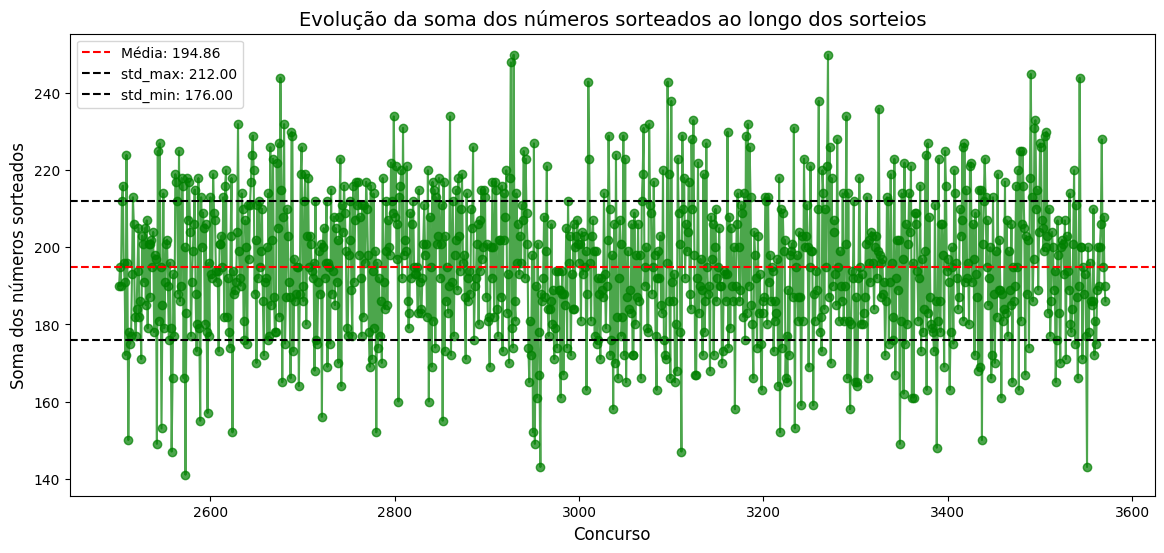

In [44]:
media_somas = results['total_sum'].mean()

results_3000 = results[results['concurso'] > 2500]

plt.figure(figsize=(14, 6))

# Plotando a evolução das somas ao longo dos sorteios
plt.plot(results_3000['concurso'], results_3000['total_sum'], color='green', marker='o', linestyle='-', alpha=0.7)

# Adicionando uma linha horizontal para a média
plt.axhline(y=media_somas, color='red', linestyle='--', label=f'Média: {media_somas:.2f}')
plt.axhline(y=212, color='black', linestyle='--', label=f'std_max: {212:.2f}')
plt.axhline(y=176, color='black', linestyle='--', label=f'std_min: {176:.2f}')

# Títulos e rótulos
plt.title('Evolução da soma dos números sorteados ao longo dos sorteios', fontsize=14)
plt.xlabel('Concurso', fontsize=12)
plt.ylabel('Soma dos números sorteados', fontsize=12)

# Legenda
plt.legend()

# Exibindo o gráfico
plt.show()